In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.reload_library()
plt.style.use(['science'])
plt.rcParams['figure.figsize'] = 24, 15
plt.rcParams['figure.figsize'] = 24, 15
plt.rcParams['xtick.labelsize'] = 35
plt.rcParams['ytick.labelsize'] = 35
plt.rcParams['font.size'] = 35

In [2]:
results_path = "../../results"
windows = [(3, 1), (5, 1), (8, 1), (8, 3), (8, 5), (12, 1), (12, 3), (12, 5), (24, 1), (24, 3), (24, 5), (36, 8), (36, 12), (48, 12), (48, 24)]
dense_paths = [f"{results_path}/dense/dense-{w[0]}-{w[1]}.csv" for w in windows]
rnn_paths = [f"{results_path}/simple_rnn/simple_rnn-{w[0]}-{w[1]}.csv" for w in windows]
lstm_paths = [f"{results_path}/lstm/lstm-{w[0]}-{w[1]}.csv" for w in windows]
ar_paths = [f"{results_path}/autoregressive/autoregressive-{w[0]}-{w[1]}.csv" for w in windows]

In [3]:
baseline_errors = pd.read_csv(f"{results_path}/baseline.csv")

In [4]:
dense_df = [pd.read_csv(path, index_col=0, usecols=["names", "train", "val", "test"]) for path in dense_paths]
rnn_df = [pd.read_csv(path, index_col=0, usecols=["names", "train", "val", "test"]) for path in rnn_paths]
lstm_df = [pd.read_csv(path, index_col=0, usecols=["names", "train", "val", "test"]) for path in lstm_paths]
ar_df = [pd.read_csv(path, index_col=0, usecols=["names", "train", "val", "test"]) for path in ar_paths]

In [5]:
def create_subtable(loss):
    losses_dense = [d[d.index == loss.lower()] for d in dense_df]
    losses_rnn = [d[d.index == loss.lower()] for d in rnn_df]
    losses_lstm = [d[d.index == loss.lower()] for d in lstm_df]
    losses_ar = [d[d.index == loss.lower()] for d in ar_df]

    df = pd.DataFrame({"windows": windows, 
                            "train_dense": [l.train.values[0] for l in losses_dense], "val_dense":[l.val.values[0] for l in losses_dense], "test_dense":[l.test.values[0] for l in losses_dense],
                            "train_rnn": [l.train.values[0] for l in losses_rnn], "val_rnn":[l.val.values[0] for l in losses_rnn], "test_rnn":[l.test.values[0] for l in losses_rnn],
                            "train_lstm": [l.train.values[0] for l in losses_lstm], "val_lstm":[l.val.values[0] for l in losses_lstm], "test_lstm":[l.test.values[0] for l in losses_lstm],
                            "train_ar": [l.train.values[0] for l in losses_ar], "val_ar":[l.val.values[0] for l in losses_ar], "test_ar":[l.test.values[0] for l in losses_ar],
                            })
    df = df.drop(columns=["train_dense", "train_rnn", "train_lstm", "train_ar"])
    df = df.reset_index(drop=True).set_index("windows")
    cols_dense = [('Dense', col) for col in df.columns if 'dense' in col]
    cols_rnn = [('RNN', col) for col in df.columns if 'rnn' in col]
    cols_lstm = [('LSTM', col) for col in df.columns if 'lstm' in col]
    cols_ar = [('AR', col) for col in df.columns if 'ar' in col]
    df.columns = pd.MultiIndex.from_tuples(cols_dense + cols_rnn + cols_lstm + cols_ar)

    if loss == "mean_squared_logarithmic_error":
        loss = "MSLE"
    if loss == "mean_squared_error":
        loss = "MSE"
    if loss == "mean_absolute_error":
        loss = "MAE"
    if loss == "root_mean_squared_error":
        loss = "RMSE"
    row_ix = pd.MultiIndex.from_product([[loss.upper()], windows])
    df = df.set_index(row_ix)
    return df
def create_table():
    losses = dense_df[0].index.values
    final_df = pd.DataFrame()
    for l in losses:
        df = create_subtable(l)
        final_df = pd.concat([final_df, df])
    final_df = final_df.round(3)
    return final_df

results_table = create_table()
results_table

Dense                RNN              LSTM            \
               val_dense test_dense val_rnn test_rnn val_lstm test_lstm   
HUBER (3, 1)       0.344      0.380   0.334    0.374    0.474     0.508   
      (5, 1)       0.375      0.411   0.347    0.388    0.473     0.508   
      (8, 1)       0.410      0.445   0.352    0.389    0.476     0.511   
      (8, 3)       0.348      0.380   0.331    0.369    0.293     0.329   
      (8, 5)       0.373      0.411   0.346    0.385    0.301     0.342   
...                  ...        ...     ...      ...      ...       ...   
RMSLE (24, 5)      0.378      0.404   0.370    0.396    0.342     0.368   
      (36, 8)      0.379      0.408   0.377    0.403    0.344     0.370   
      (36, 12)     0.384      0.411   0.384    0.407    0.347     0.375   
      (48, 12)     0.387      0.414   0.387    0.412    0.347     0.375   
      (48, 24)     0.392      0.418   0.394    0.418    0.350     0.377   

                   AR          
               val_ar test_ar  
HUBER (3, 1)    0.293   0.325  
      (5, 1)    0.301   0.333  
      (8, 1)    0.300   0.332  
      (8, 3)    0.295   0.328  
      (8, 5)    0.306   0.344  
...               ...     ...  
RMSLE (24, 5)   0.360   0.384  
      (36, 8)   0.357   0.385  
      (36, 12)  0.371   0.402  
      (48, 12)  0.367   0.395  
      (48, 24)  0.372   0.397  

[90 rows x 8 columns]

In [6]:
print(results_table.to_latex(multirow=True).replace("\_dense", "").replace("\_rnn", "").replace("\_lstm", "").replace("llrrrrrrrr", "ll|rr|rr|rr|rr").replace("tabular", "longtable"))

\begin{longtable}{ll|rr|rr|rr|rr}
\toprule
      &          & \multicolumn{2}{l}{Dense} & \multicolumn{2}{l}{RNN} & \multicolumn{2}{l}{LSTM} & \multicolumn{2}{l}{AR} \\
      &          & val & test & val & test & val & test & val\_ar & test\_ar \\
\midrule
\multirow{15}{*}{HUBER} & (3, 1) &     0.344 &      0.380 &   0.334 &    0.374 &    0.474 &     0.508 &  0.293 &   0.325 \\
      & (5, 1) &     0.375 &      0.411 &   0.347 &    0.388 &    0.473 &     0.508 &  0.301 &   0.333 \\
      & (8, 1) &     0.410 &      0.445 &   0.352 &    0.389 &    0.476 &     0.511 &  0.300 &   0.332 \\
      & (8, 3) &     0.348 &      0.380 &   0.331 &    0.369 &    0.293 &     0.329 &  0.295 &   0.328 \\
      & (8, 5) &     0.373 &      0.411 &   0.346 &    0.385 &    0.301 &     0.342 &  0.306 &   0.344 \\
      & (12, 1) &     0.435 &      0.472 &   0.378 &    0.418 &    0.472 &     0.506 &  0.296 &   0.326 \\
      & (12, 3) &     0.344 &      0.379 &   0.334 &    0.370 &    0.294 &     0.330 & 

In [7]:
def plot_error(values, error):
    df = values[[('Dense',  'test_dense'), ('RNN',  'test_rnn'), ('LSTM',  'test_lstm'), ('AR',  'test_ar')]]
    df = df.loc[[error]].reset_index().rename(columns={'level_1': 'windows'}).set_index("windows").drop(columns=["level_0"])
    df.columns = df.columns.droplevel()
    _, ax = plt.subplots()
    fig = df.plot(kind="bar", figsize=(32, 12), ax=ax).get_figure()
    baseline = baseline_errors[baseline_errors.names == error.lower()]["test"].values[0]
    plt.plot([-1, 100], [baseline] * 2)
    ax.set_ylabel(error)
    ax.set_xlabel("WINDOWS")
    plt.legend(facecolor='white', framealpha=1)
    ax.legend(["Baseline","Dense", "RNN", "LSTM", "AR"],facecolor='white', framealpha=1,loc='lower left')
    fig.savefig(f'./plots/{error}.png')

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


[None, None, None, None, None, None]

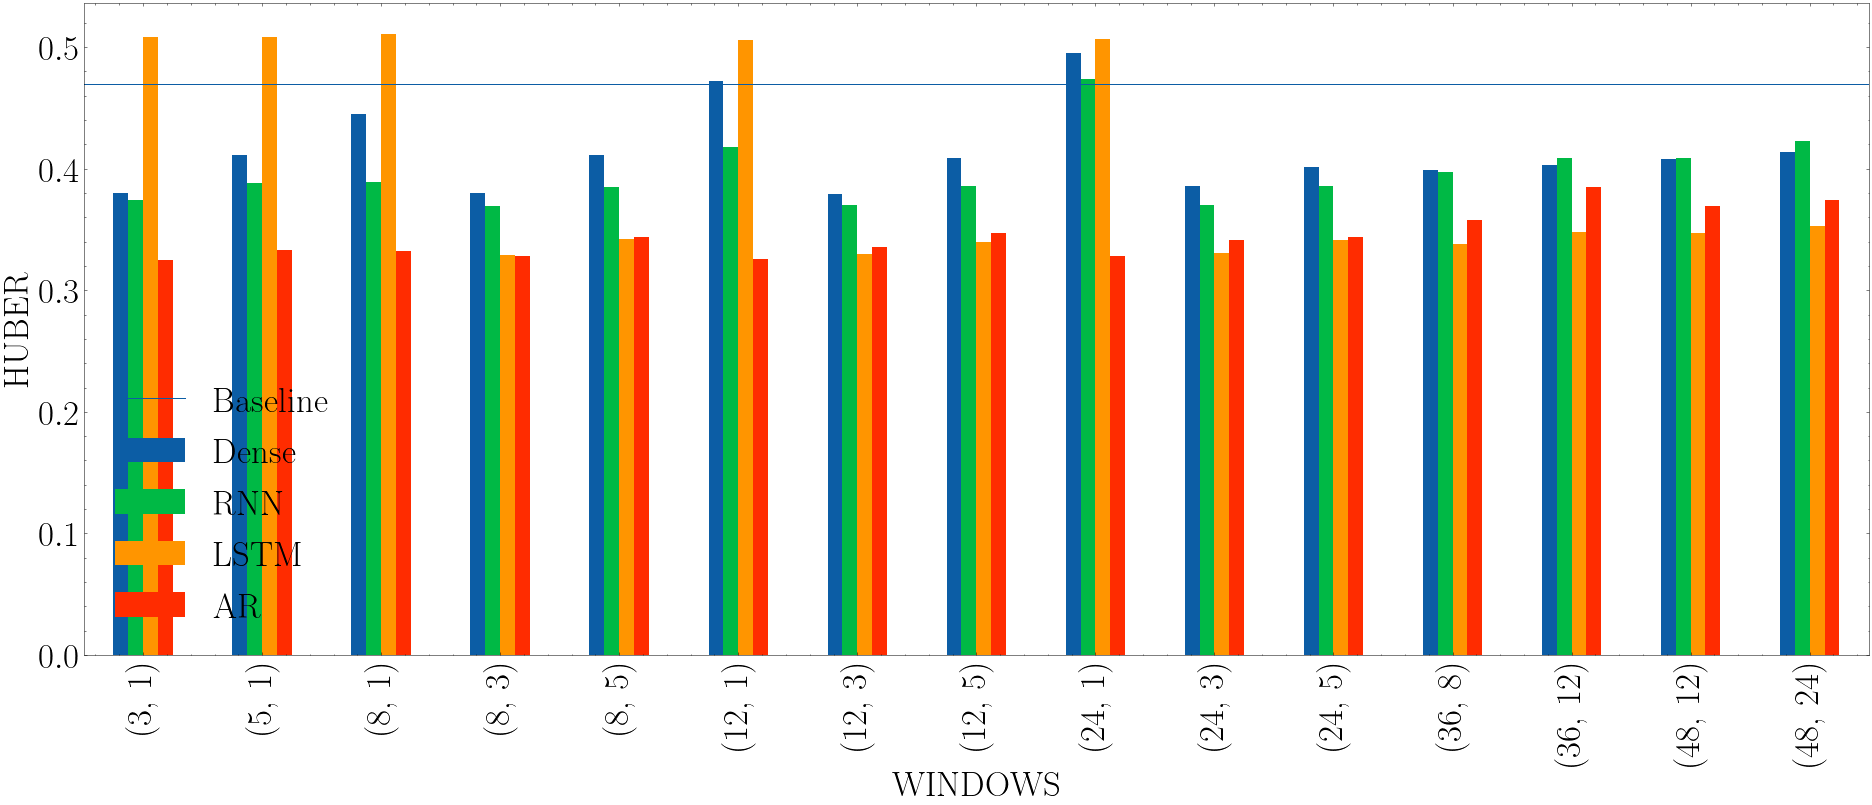

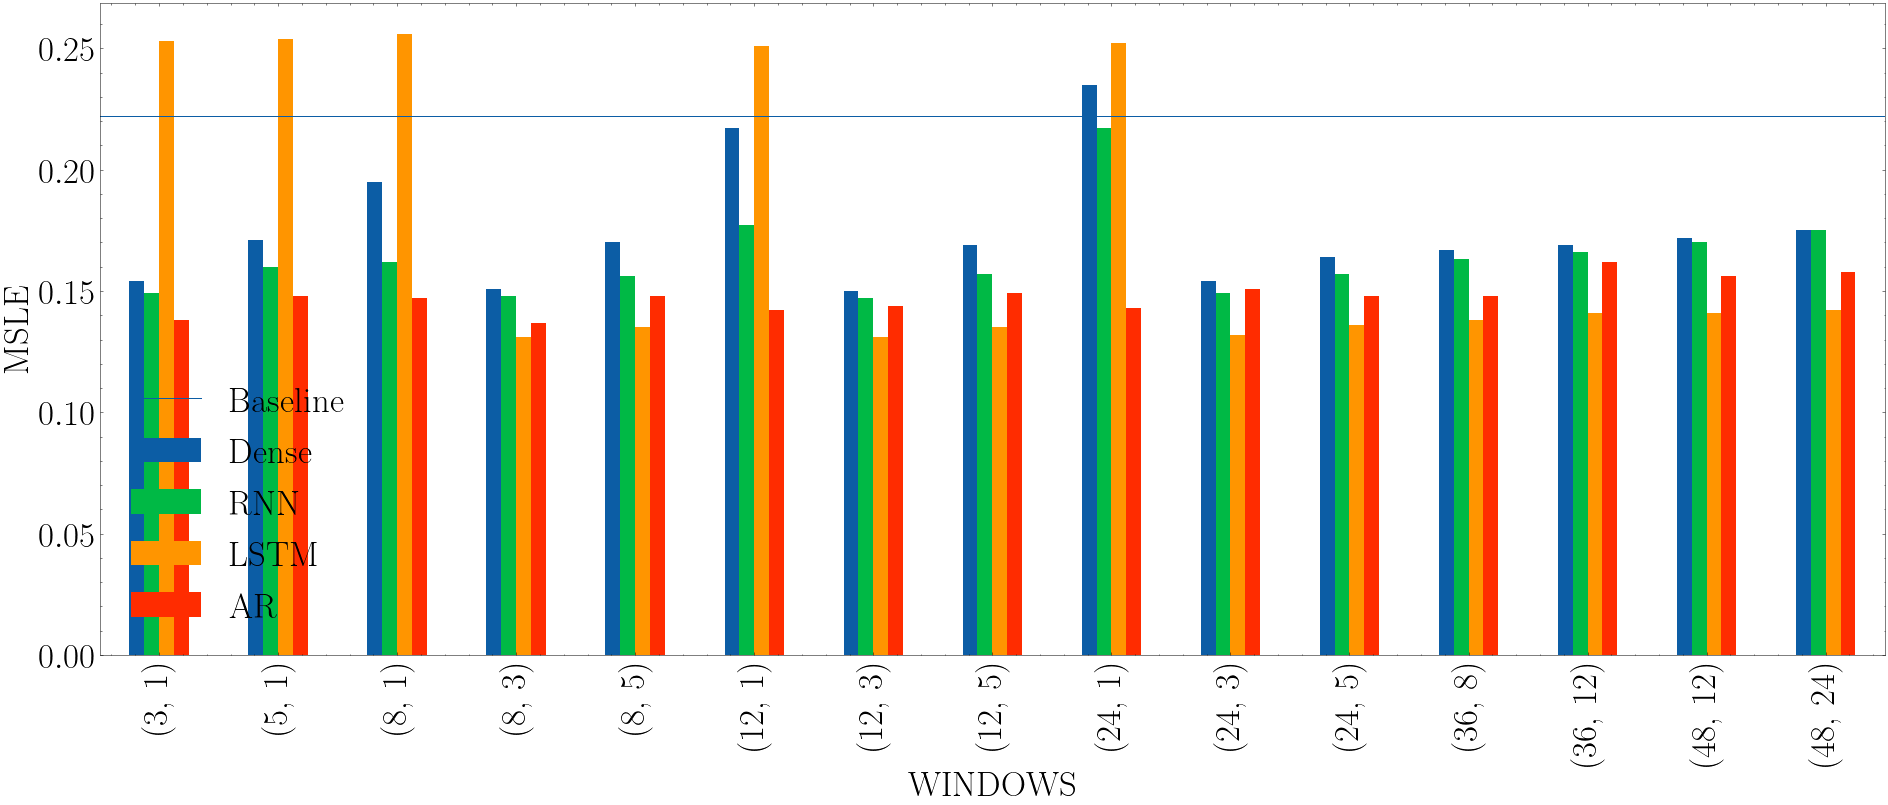

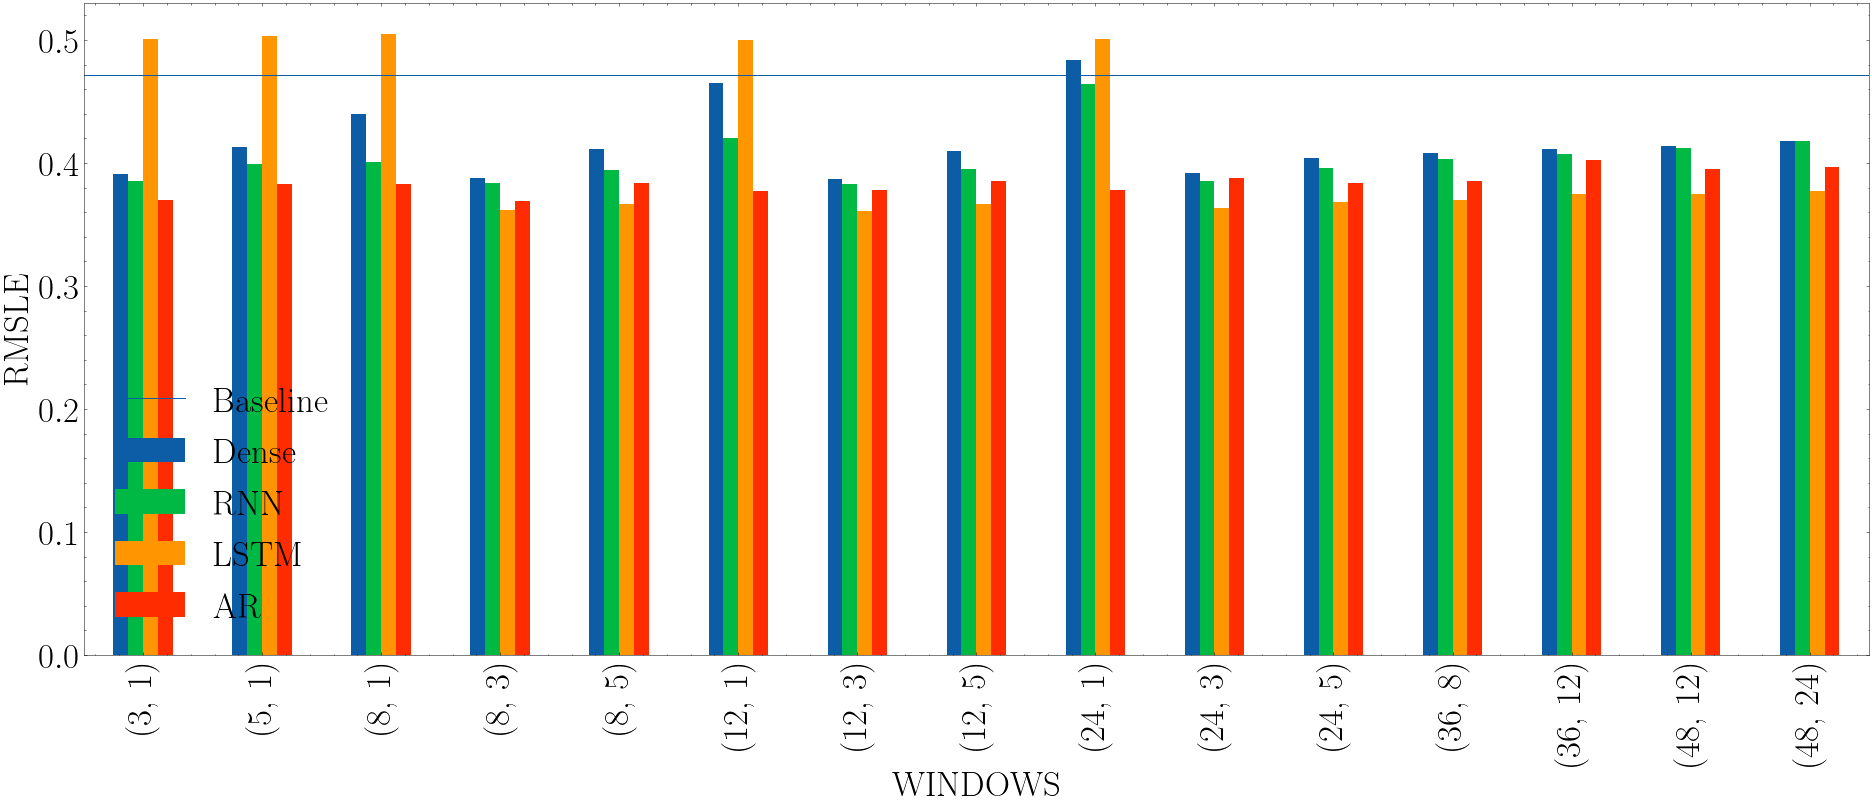

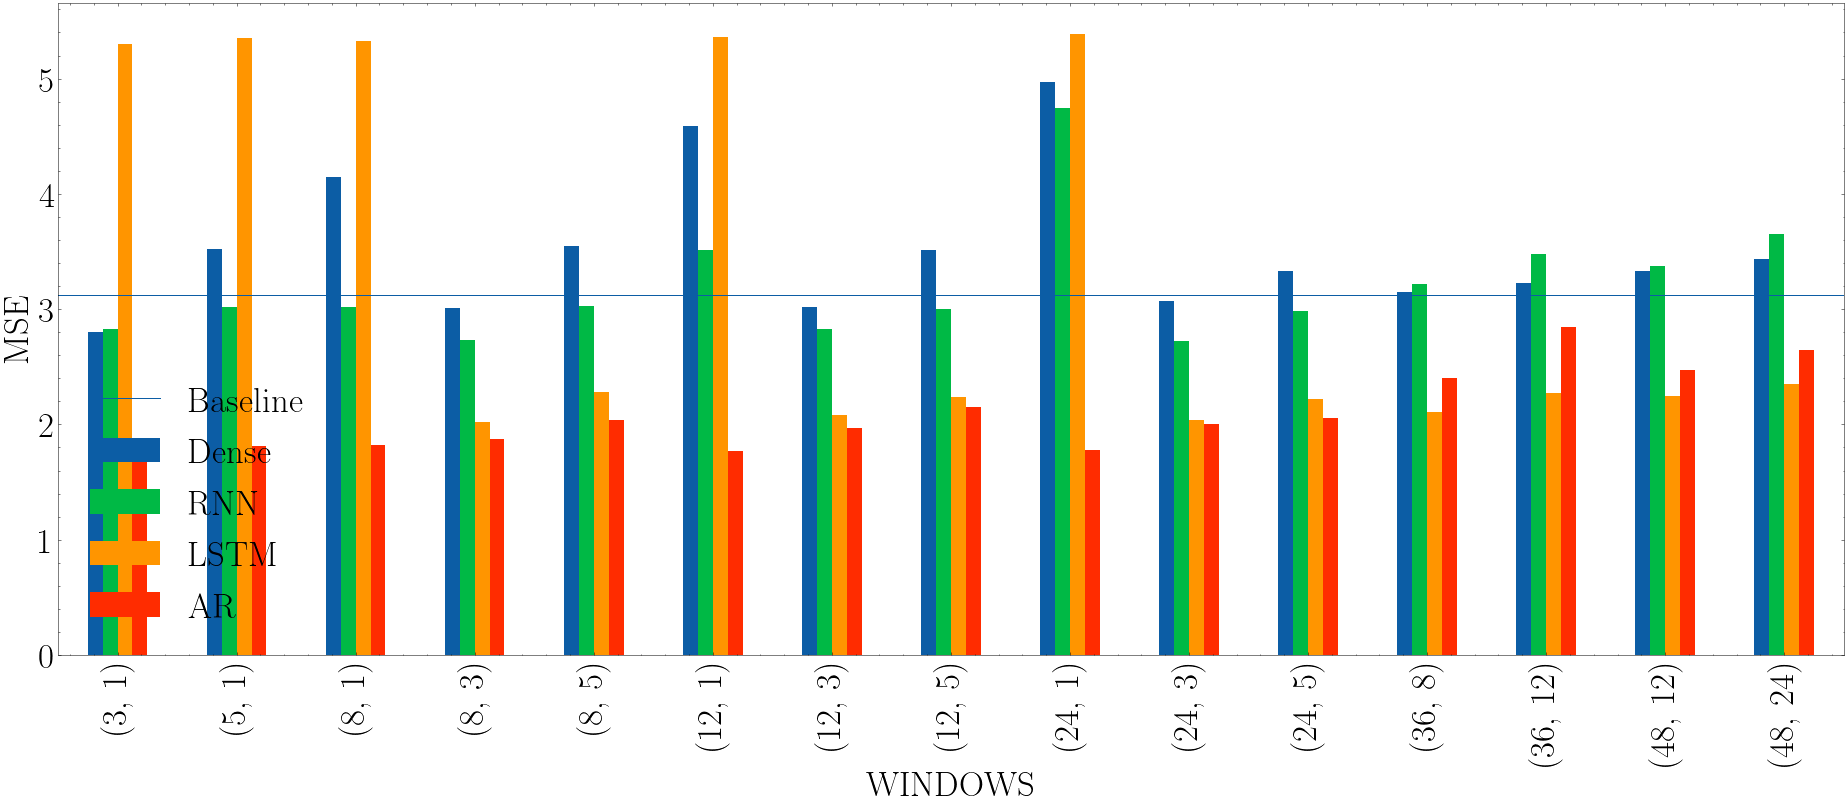

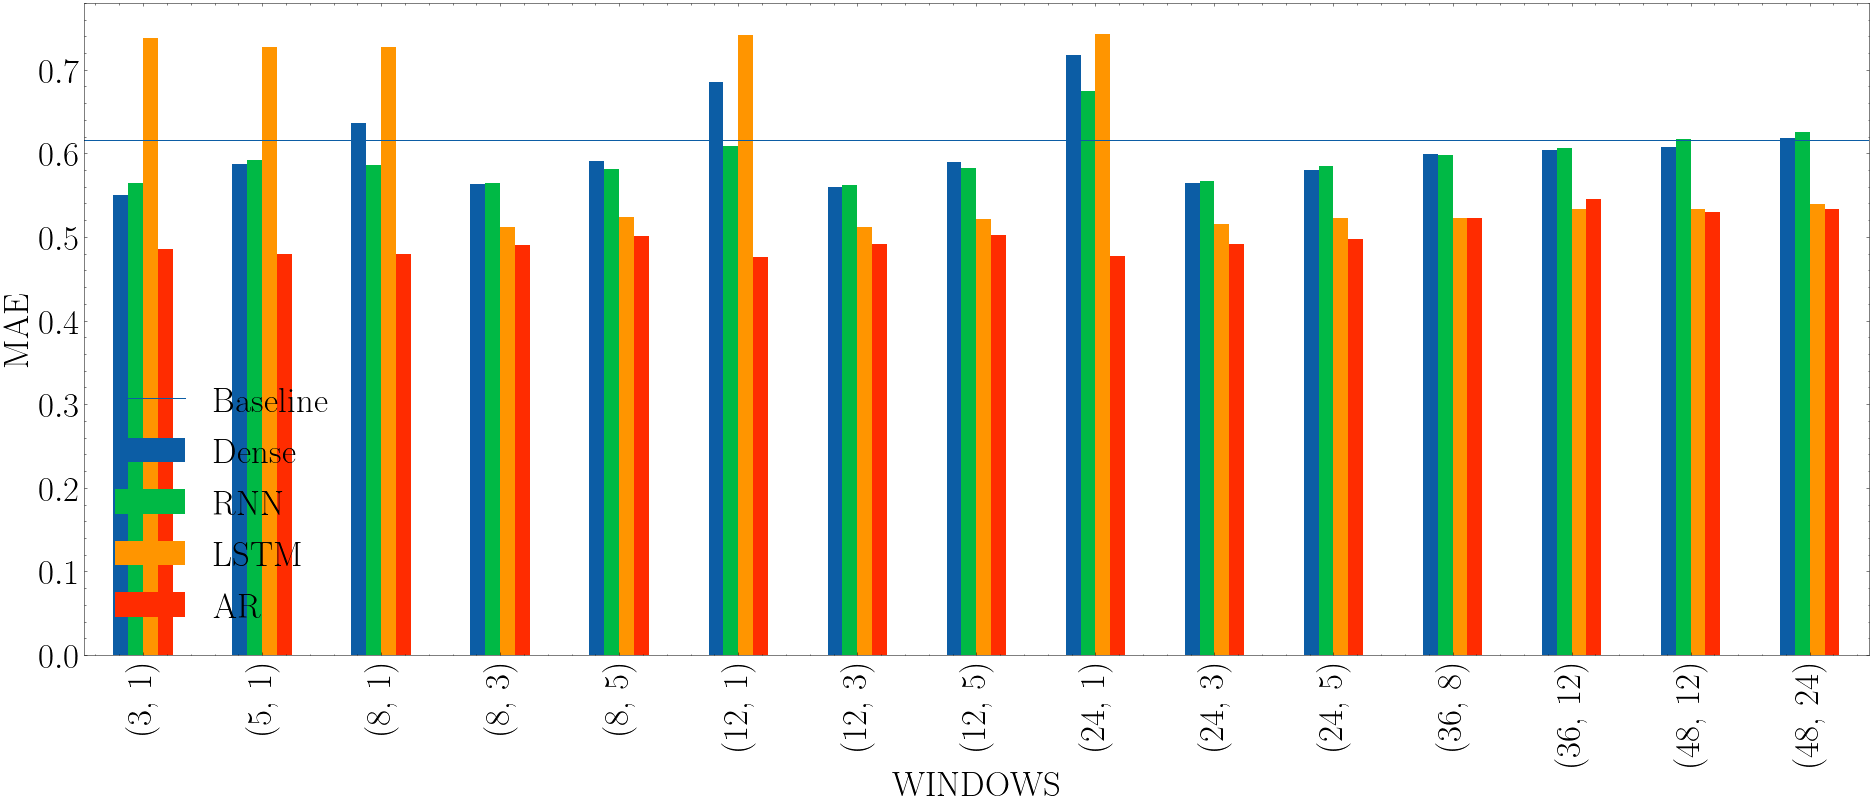

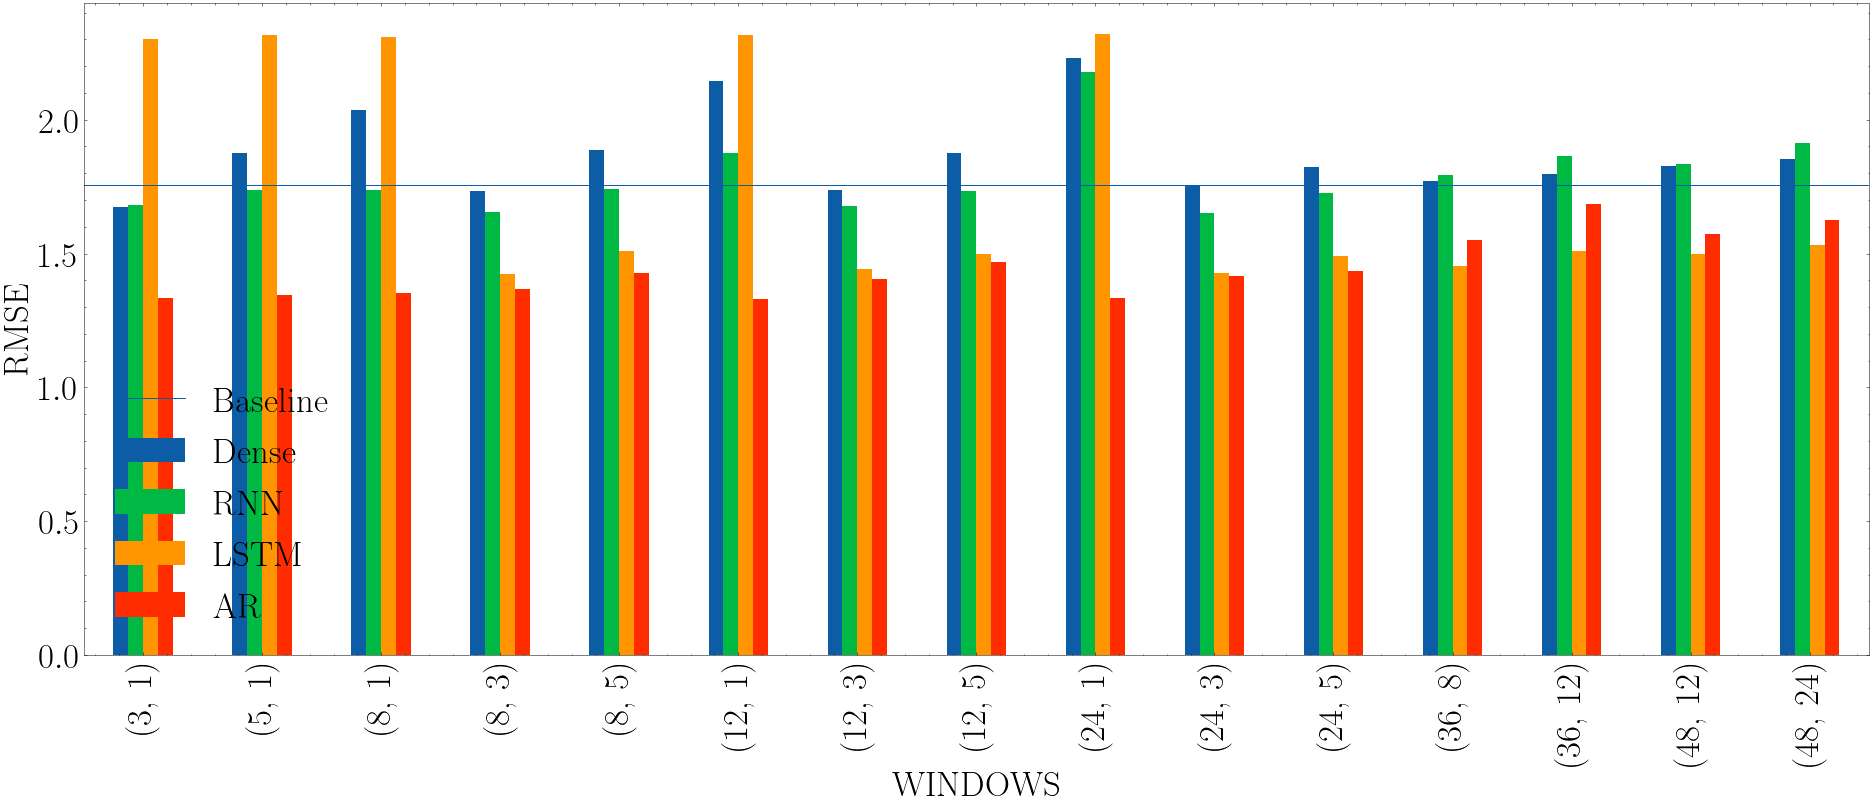

In [8]:
[plot_error(results_table, e) for e in ["HUBER", "MSLE", "RMSLE", "MSE", "MAE", "RMSE" ]]